In [1]:
import numpy as np 
import torch 
import torch.nn as nn 
import matplotlib.pyplot as plt 


In [2]:
# create a canvTranspose2d class instance with parameters

# parameters 
inChans = 3
outChans = 15
krnSize = 5
stride = 1
padding = 0

c = nn.ConvTranspose2d(inChans, outChans, krnSize,stride, padding)

print(c)
print(' ')

# check out its weight 
print('Size of weights: ' + str(c.weight.shape))
print('Size of bias: ' + str(c.bias.shape))

ConvTranspose2d(3, 15, kernel_size=(5, 5), stride=(1, 1))
 
Size of weights: torch.Size([3, 15, 5, 5])
Size of bias: torch.Size([15])


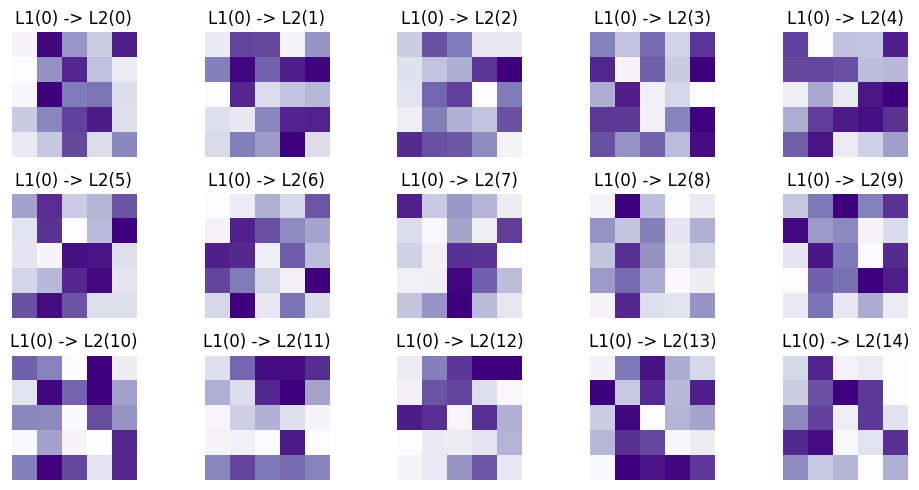

In [4]:
fig, axs = plt.subplots(3, 5, figsize = (10, 5))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(torch.squeeze(c.weight[0, i, :, :]).detach(), cmap = 'Purples')
    ax.set_title('L1(0) -> L2(%s)' %i)
    ax.axis('off')
plt.tight_layout()
plt.show()

torch.Size([1, 3, 64, 64])
torch.Size([64, 64, 3, 1])


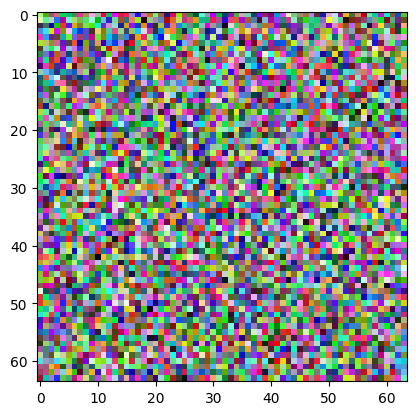

In [6]:
# Convolve with an image 
imsize = (1, 3, 64, 64)

img = torch.rand(imsize)

# pytorch requires channels first but matplotlib requires em last 
img2view = img.permute(2, 3, 1, 0).detach()
print(img.shape)
print(img2view.shape)

plt.imshow(np.squeeze(img2view))
plt.show()

In [7]:
convRes = c(img)
print(img.shape)
print(convRes.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 68, 68])


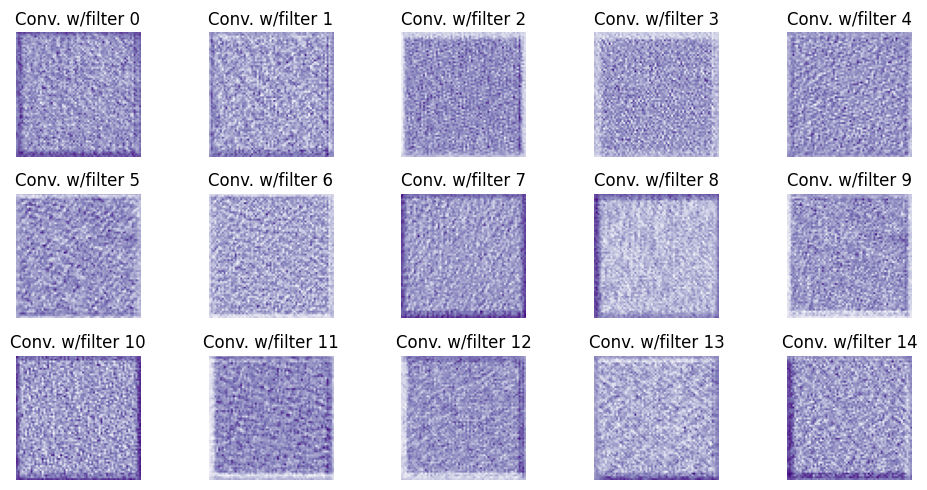

In [8]:
fig, axs = plt.subplots(3, 5, figsize = (10, 5))

for i, ax in enumerate(axs.flatten()):

    I = torch.squeeze(convRes[0, i, :, :]).detach()
    ax.imshow(I, cmap = 'Purples')
    ax.set_title('Conv. w/filter %s'%i)
    ax.axis('off')
plt.tight_layout()
plt.show()